In [5]:
from google.colab import files
uploaded = files.upload()

Saving main.csv to main.csv


In [6]:
uploaded_sec = files.upload()

Saving from_model.csv to from_model.csv


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx
import numpy as np
import ast
import nltk

### Import csv files

In [7]:
total_filename = '/content/from_model.csv'
graph_filename = '/content/main.csv'

In [8]:
df = pd.read_csv(total_filename, encoding="utf-8")
df = df.drop(columns=[df.columns[0]])
df

,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,tweet,verdict,RT,source_user,target_user
0,greg_kassie,2021-09-21 16:28:08+00:00,,1440352153944555529,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,greg_kassie
1,JerryLeban,2021-09-21 16:18:49+00:00,,1440349810012291073,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,JerryLeban
2,qui_donna,2021-09-21 16:10:00+00:00,,1440347591124811787,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,qui_donna
3,CathyCali1,2021-09-21 16:04:04+00:00,,1440346096639746055,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,CathyCali1
4,GianPulmones,2021-09-21 15:58:15+00:00,,1440344633121271810,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,GianPulmones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,KoG062619,2021-09-18 00:58:04+00:00,,1439030932283871235,tl,0,0,0,0,@iamjeangrey @alejand12072264 @stgatchalian Th...,FALSE,False,KoG062619,alejand12072264
2411,KoG062619,2021-09-18 00:58:04+00:00,,1439030932283871235,tl,0,0,0,0,@iamjeangrey @alejand12072264 @stgatchalian Th...,FALSE,False,KoG062619,stgatchalian
2412,dzbb,2021-09-17 23:39:27+00:00,,1439011147240198151,tl,0,0,0,0,@SecDuque @DOHgovph @gtvphilippines Sec. Duque...,TRUE,False,dzbb,DOHgovph
2413,dzbb,2021-09-17 23:39:27+00:00,,1439011147240198151,tl,0,0,0,0,@SecDuque @DOHgovph @gtvphilippines Sec. Duque...,TRUE,False,dzbb,gtvphilippines


In [9]:
df2 = pd.read_csv(graph_filename, encoding="utf-8")
df2

,Id,Label,timeset,degree,group,source,target,verdict
0,WinGatchalian74,WinGatchalian74,NaN,35,0,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15...",[2414],not_disinformation
1,greg_kassie,greg_kassie,NaN,1,0,[],[0],not_disinformation
2,JerryLeban,JerryLeban,NaN,1,0,[],[1],not_disinformation
3,qui_donna,qui_donna,NaN,1,0,[],[2],not_disinformation
4,CathyCali1,CathyCali1,NaN,1,0,[],[3],not_disinformation
...,...,...,...,...,...,...,...,...
582,TheDoctorLuck,TheDoctorLuck,NaN,2,16,[],"[2397, 2401]",not_disinformation
583,lumpialogic,lumpialogic,NaN,1,16,[],[2398],not_disinformation
584,GeneralEleazar,GeneralEleazar,NaN,1,16,[],[2404],not_disinformation
585,dexcabalzaINQ,dexcabalzaINQ,NaN,1,13,[],[2405],not_disinformation


### Convert List String into List

In [10]:
for i in df2.index:
  row = df2.iloc[i]
  #Source
  source = row.source
  source = ast.literal_eval(source)
  df2.at[i,'source'] = source
  #Target
  target = row.target
  target = ast.literal_eval(target)
  df2.at[i,'target'] = target


df2

,Id,Label,timeset,degree,group,source,target,verdict
0,WinGatchalian74,WinGatchalian74,NaN,35,0,"[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15...",[2414],not_disinformation
1,greg_kassie,greg_kassie,NaN,1,0,[],[0],not_disinformation
2,JerryLeban,JerryLeban,NaN,1,0,[],[1],not_disinformation
3,qui_donna,qui_donna,NaN,1,0,[],[2],not_disinformation
4,CathyCali1,CathyCali1,NaN,1,0,[],[3],not_disinformation
...,...,...,...,...,...,...,...,...
582,TheDoctorLuck,TheDoctorLuck,NaN,2,16,[],"[2397, 2401]",not_disinformation
583,lumpialogic,lumpialogic,NaN,1,16,[],[2398],not_disinformation
584,GeneralEleazar,GeneralEleazar,NaN,1,16,[],[2404],not_disinformation
585,dexcabalzaINQ,dexcabalzaINQ,NaN,1,13,[],[2405],not_disinformation


### Getting Rows depending on found tweets

In [11]:
source = []
target = []

for i in df2.index:
  row = df2.iloc[i]
  curr_source = row.source
  curr_target = row.target

  source = source + curr_source
  target = target + curr_target

  if i != 0:
    source = list(set(source + curr_source))
    target = list(set(target + curr_target))

combined_row = list(set(source + target))
combined_row.sort()
print('Rows: ' + str(combined_row))

Rows: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 188, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238

In [12]:
filtered_df = pd.DataFrame(columns=df.columns)

for i in combined_row:
  row = df.iloc[i]
  filtered_df = filtered_df.append(row, sort=False)


filtered_df

,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,tweet,verdict,RT,source_user,target_user
0,greg_kassie,2021-09-21 16:28:08+00:00,,1440352153944555529,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,greg_kassie
1,JerryLeban,2021-09-21 16:18:49+00:00,,1440349810012291073,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,JerryLeban
2,qui_donna,2021-09-21 16:10:00+00:00,,1440347591124811787,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,qui_donna
3,CathyCali1,2021-09-21 16:04:04+00:00,,1440346096639746055,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,CathyCali1
4,GianPulmones,2021-09-21 15:58:15+00:00,,1440344633121271810,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,GianPulmones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,PetDogLover23,2021-09-19 13:31:51+00:00,,1439583014078464001,tl,0,0,0,0,@forthenationPH @dzbb @jhomer_apresto hindi si...,FALSE,False,PetDogLover23,dzbb
2407,PetDogLover23,2021-09-19 13:31:51+00:00,,1439583014078464001,tl,0,0,0,0,@forthenationPH @dzbb @jhomer_apresto hindi si...,FALSE,False,PetDogLover23,jhomer_apresto
2412,dzbb,2021-09-17 23:39:27+00:00,,1439011147240198151,tl,0,0,0,0,@SecDuque @DOHgovph @gtvphilippines Sec. Duque...,TRUE,False,dzbb,DOHgovph
2413,dzbb,2021-09-17 23:39:27+00:00,,1439011147240198151,tl,0,0,0,0,@SecDuque @DOHgovph @gtvphilippines Sec. Duque...,TRUE,False,dzbb,gtvphilippines


In [13]:
df_filter = df.copy()

df_filter = df_filter.reset_index()
df_filter = df_filter.drop(columns=[df_filter.columns[0]])
df_filter["created_at"] = df_filter["created_at"].astype('datetime64[ns]')
df_filter

,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,tweet,verdict,RT,source_user,target_user
0,greg_kassie,2021-09-21 16:28:08,,1440352153944555529,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,greg_kassie
1,JerryLeban,2021-09-21 16:18:49,,1440349810012291073,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,JerryLeban
2,qui_donna,2021-09-21 16:10:00,,1440347591124811787,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,qui_donna
3,CathyCali1,2021-09-21 16:04:04,,1440346096639746055,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,CathyCali1
4,GianPulmones,2021-09-21 15:58:15,,1440344633121271810,tl,0,0,0,34,Dapat mayroong sapat na abiso sa mga lugar na ...,MOSTLY_TRUE,True,WinGatchalian74,GianPulmones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,KoG062619,2021-09-18 00:58:04,,1439030932283871235,tl,0,0,0,0,@iamjeangrey @alejand12072264 @stgatchalian Th...,FALSE,False,KoG062619,alejand12072264
2411,KoG062619,2021-09-18 00:58:04,,1439030932283871235,tl,0,0,0,0,@iamjeangrey @alejand12072264 @stgatchalian Th...,FALSE,False,KoG062619,stgatchalian
2412,dzbb,2021-09-17 23:39:27,,1439011147240198151,tl,0,0,0,0,@SecDuque @DOHgovph @gtvphilippines Sec. Duque...,TRUE,False,dzbb,DOHgovph
2413,dzbb,2021-09-17 23:39:27,,1439011147240198151,tl,0,0,0,0,@SecDuque @DOHgovph @gtvphilippines Sec. Duque...,TRUE,False,dzbb,gtvphilippines


In [14]:
#df_filter = df_filter.loc[(df_filter.username.duplicated(keep=False))]
#df_filter = df_filter.loc[(df_filter.tweet.duplicated(keep='first'))]
df_filter = df_filter.sort_values('created_at')
df_filter['created_at'] = df_filter['created_at'].dt.date
df_filter

,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,tweet,verdict,RT,source_user,target_user
696,twixiinaes,2021-09-16,,1438292323356450816,en,0,0,0,4,Can Aspirin and Paracetamol cure COVID-19?\n\n...,TRUE,True,FactCheckPhils,twixiinaes
695,pnppio,2021-09-16,,1438294617280106496,en,9,0,1,2,UPDATE: PNP Health Service recorded the follow...,TRUE,False,pnppio,NaN
184,dcadd_spd,2021-09-16,,1438300063013343233,tl,0,0,0,2,Ipapatupad ang mas maiksing curfew hours sa Me...,TRUE,True,PIADesk,dcadd_spd
1815,DZMMTeleRadyo,2021-09-16,,1438304019265511425,tl,0,0,0,1,"Sa kasalukuyan, nasa 1,100 ang aktibong kaso n...",TRUE,False,DZMMTeleRadyo,NaN
1814,DZMMTeleRadyo,2021-09-16,,1438309902263275521,tl,2,0,1,1,Pinuri ni Duterte ang pagdinig ng House Commit...,TRUE,False,DZMMTeleRadyo,joycebalancio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,PIACaraga,2021-09-21,,1440463927394005002,tl,0,0,0,7,Kumuha lamang ng impormasyon sa mga mapagkakat...,TRUE,True,DOHgovph,PIACaraga
1818,PIACaraga,2021-09-21,,1440463937980432390,tl,0,0,0,3,"Hikayatin ang mga kapamilya, kaibigan, at katr...",TRUE,True,DOHgovph,PIACaraga
1252,PIACaraga,2021-09-21,,1440463937980432390,tl,0,0,0,3,"Hikayatin ang mga kapamilya, kaibigan, at katr...",TRUE,True,DOHgovph,PIACaraga
1817,PIACaraga,2021-09-21,,1440464118591287302,tl,0,0,0,1,Tiniyak din niya na hindi nababawasan ang bisa...,TRUE,True,pcoogov,PIACaraga


In [15]:
df_date = pd.DataFrame(columns=['created_at','verdict','count'])

for date in df_filter.created_at.unique():
  date_json = df_filter.loc[df_filter.created_at == date].verdict.value_counts().to_dict()
  for key,value in date_json.items():
    df_date = df_date.append({'created_at':date.strftime('%Y/%m/%d'),'verdict':key,'count':value},ignore_index=True)

df_date

,created_at,verdict,count
0,2021/09/16,TRUE,309
1,2021/09/16,MOSTLY_TRUE,25
2,2021/09/16,FALSE,8
3,2021/09/16,MOSTLY_FALSE,3
4,2021/09/16,HALF_TRUE,2
5,2021/09/17,TRUE,266
6,2021/09/17,MOSTLY_TRUE,49
7,2021/09/17,MOSTLY_FALSE,13
8,2021/09/17,FALSE,4
9,2021/09/17,HALF_TRUE,1


In [16]:
for date in df_date.created_at.unique():
  df = df_date.loc[df_date.created_at==date]
  verdicts = df.verdict.unique()
  if len(verdicts) != 5:
    if 'HALF_TRUE' not in verdicts:
      df_date = df_date.append({'created_at':date,'verdict':'HALF_TRUE','count':0},ignore_index=True)
    elif 'MOSTLY_FALSE' not in verdicts:
      df_date = df_date.append({'created_at':date,'verdict':'MOSTLY_FALSE','count':0},ignore_index=True)
    elif 'FALSE' not in verdicts:
      df_date = df_date.append({'created_at':date,'verdict':'FALSE','count':0},ignore_index=True)
    elif 'MOSTLY_TRUE' not in verdicts:
      df_date = df_date.append({'created_at':date,'verdict':'MOSTLY_TRUE','count':0},ignore_index=True)

df_date = df_date.sort_values(by=['created_at','verdict'])
df_date

,created_at,verdict,count
2,2021/09/16,FALSE,8
4,2021/09/16,HALF_TRUE,2
3,2021/09/16,MOSTLY_FALSE,3
1,2021/09/16,MOSTLY_TRUE,25
0,2021/09/16,TRUE,309
8,2021/09/17,FALSE,4
9,2021/09/17,HALF_TRUE,1
7,2021/09/17,MOSTLY_FALSE,13
6,2021/09/17,MOSTLY_TRUE,49
5,2021/09/17,TRUE,266


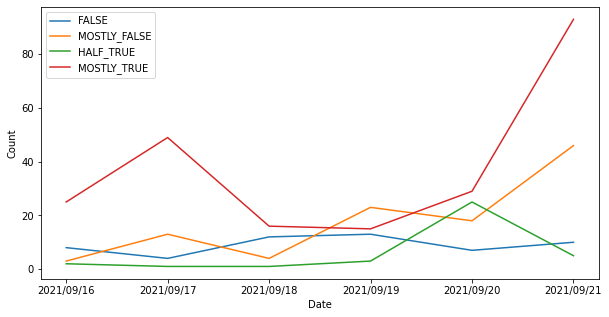

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
dates = df_date.created_at.unique()
false = df_date.loc[df_date.verdict=='FALSE']['count'].to_list()
mf = df_date.loc[df_date.verdict=='MOSTLY_FALSE']['count'].to_list()
ht = df_date.loc[df_date.verdict=='HALF_TRUE']['count'].to_list()
mt = df_date.loc[df_date.verdict=='MOSTLY_TRUE']['count'].to_list()
true = df_date.loc[df_date.verdict=='TRUE']['count'].to_list()

ax.plot(dates, np.array(false))
ax.plot(dates, np.array(mf))
ax.plot(dates, np.array(ht))
ax.plot(dates, np.array(mt))
#ax.plot(dates, np.array(true))
ax.set_xlabel('Date')
ax.set_ylabel('Count');
ax.legend(['FALSE','MOSTLY_FALSE','HALF_TRUE','MOSTLY_TRUE','TRUE'])

In [18]:
user_change = []

for user in df_filter.username.unique():
  verdicts = df_filter.loc[df_filter.username==user].verdict.to_list()
  if (('TRUE' in verdicts) or ('MOSTLY_TRUE' in verdicts)) and (('FALSE' in verdicts) or ('MOSTLY_FALSE' in verdicts) or ('HALF_TRUE' in verdicts)):
    user_change.append(user)

user_change

['pcooglobalmedia',
 'PIADesk',
 'dzrhnews',
 'piawesmin',
 'pia_ev',
 '2022pollwatch',
 'ProfessorUno',
 'NationPinoy',
 'serrano_rene',
 'myowntab',
 'hampoyjampoy',
 'LilMsMalditaMD',
 'infectious_dx',
 'PIACaraga',
 'lotusflor122',
 'theBlackSonata']